# project 4 : Time Series Forecasting for Microsoft Company Stock Market
by : Modhi Almannaa - Shahad Almangor - Rehab Alharbi

-----
## Introduction

in this project we tried to do a Time Series Forecasting for Microsoft Company Stock Market the dataset we get it form Kaggle , it's already cleaned but we tried to do EDA and try to fitting different time series model to get the best score.

Microsoft Dataset was collected from twelvedata.com by web scraping, Microsoft Stock market from 2001 to the beginning of 2021. we worked on this data using time series analysis and models.
- [Microsoft Stock Market](https://www.kaggle.com/rawaneid/microsoft-stock-market-2001-2021)

Our goal is to predict the stock market of Microsoft in the future by using time series models and find the lowest error rate.

### Contents:
- [Loading main libraries](#1.Loading-main-libraries)
- [Load the Microsoft data](#2.Load-the-Microsoft-data)
- [Modeling](#3.Modeling)
 - [a.Autoregressive Model (AR)](#a.Autoregressive-Model-(AR))
 - [b.ARIMA model](#b.ARIMA-model)
 - [c.Holt Model](#c.Holt-Model)
 - [d.Exponentia lSmoothing Model:](#d.Exponentia-lSmoothing-Model)



## 1.Loading main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pmdarima import auto_arima

np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('seaborn')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading autocorrelation ACF,PACF,plots, and seasonal decompose

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

## 2.Load the Microsoft data


Microsoft Stock market from 2001 to the beginning of 2021.

In [5]:
Microsoft_df= pd.read_csv('./archive/MSFT_Stock.csv')

In [6]:
Microsoft_df.head()

,Unnamed: 0,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [7]:
Microsoft_df.isnull().sum()

Unnamed: 0    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

In [8]:
Microsoft_df.rename(columns={'Unnamed: 0':'date'}, inplace=True) # inplace = True updates mydata
print(Microsoft_df.columns)

Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [9]:
Microsoft_df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

### Create a datetime index


This is date data type object and converting to datetime.

In [10]:
Microsoft_df['date'] = pd.to_datetime(Microsoft_df.date )
Microsoft_df.set_index('date', inplace=True, drop=True)


In [11]:
Microsoft_df.index

DatetimeIndex(['2001-03-16', '2001-03-19', '2001-03-20', '2001-03-21',
               '2001-03-22', '2001-03-23', '2001-03-26', '2001-03-27',
               '2001-03-28', '2001-03-29',
               ...
               '2021-01-15', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-25', '2021-01-26', '2021-01-27',
               '2021-01-28', '2021-01-29'],
              dtype='datetime64[ns]', name='date', length=5000, freq=None)

In [12]:
subset_df=Microsoft_df[['close']]
subset_df=subset_df.resample('Q').mean()
subset_df.head()

,close
date,
2001-03-31,27.369318
2001-06-30,33.851210
2001-09-30,31.238390
2001-12-31,31.523672
2002-03-31,31.466250


### Visually examine

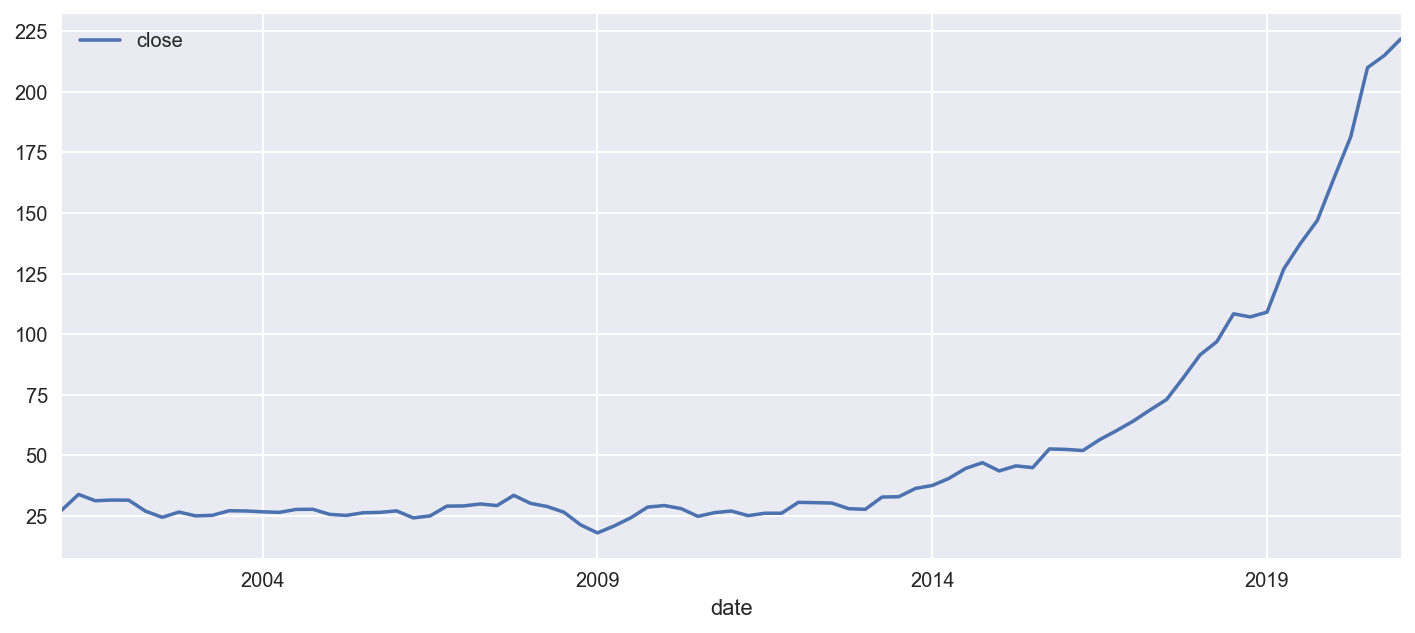

In [13]:
subset_df[['close']].plot(figsize=(12, 5));

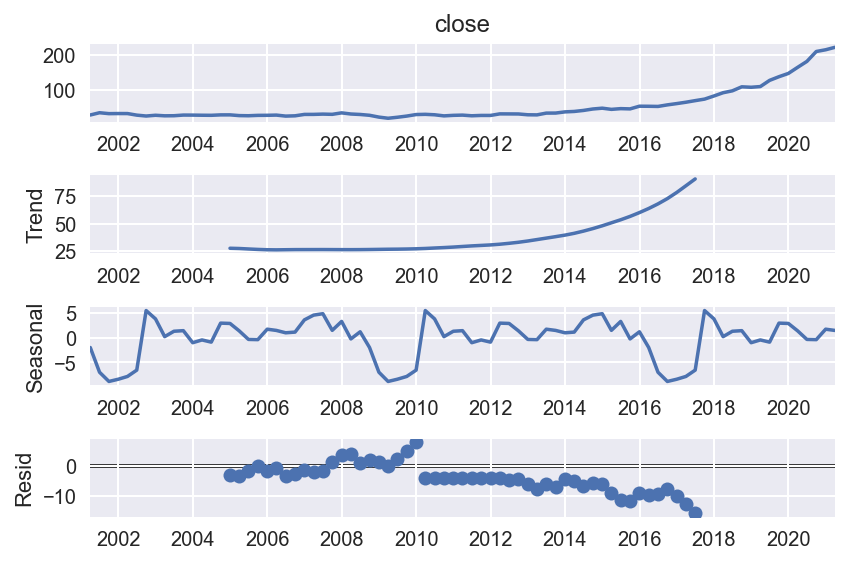

In [14]:
result = seasonal_decompose(subset_df['close'],freq=30)
result.plot();

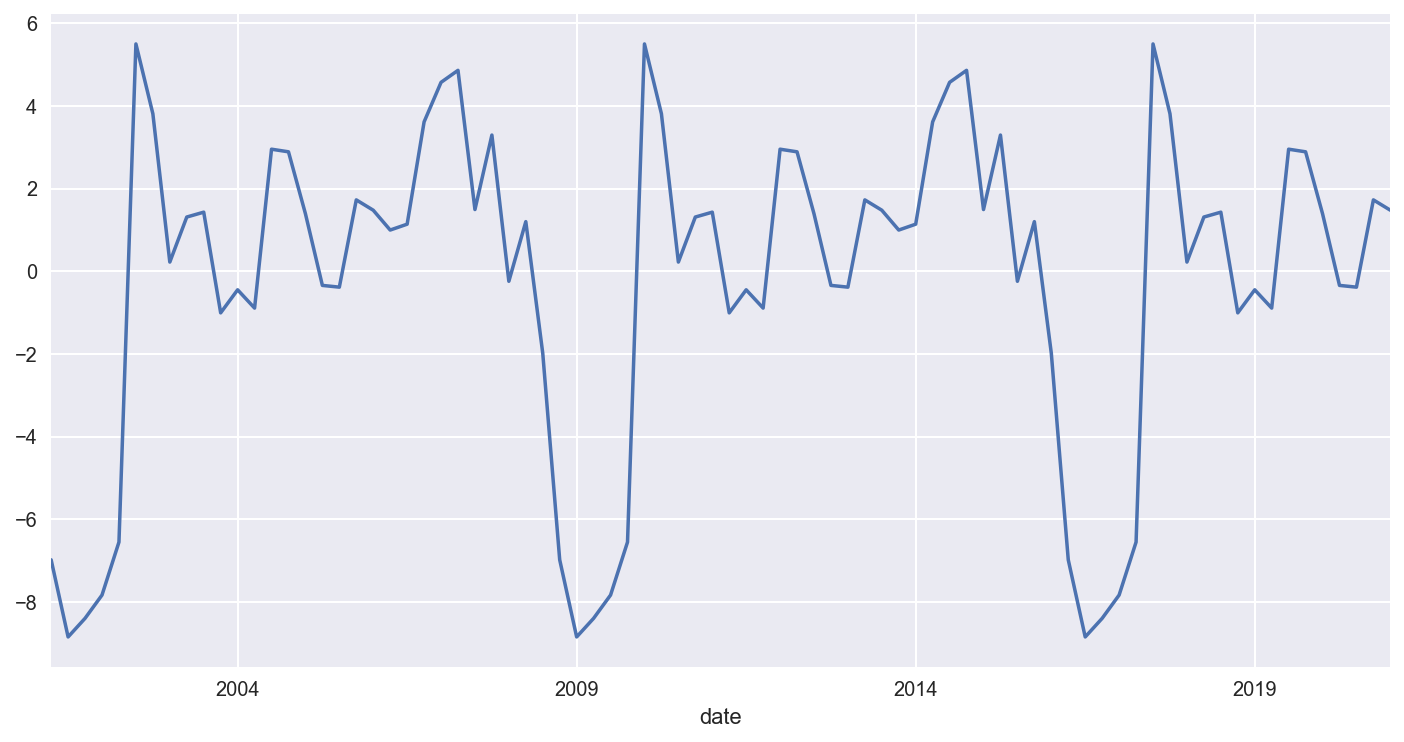

In [15]:
ax=result.seasonal[1:190].plot(figsize=(12,6))

###  Check if stationary

In [16]:
# !pip install pmdarima

In [17]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
adf_test(subset_df['close'])

Augmented Dickey-Fuller Test: 
ADF test statistic       3.401597
p-value                  1.000000
# lags used             12.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [19]:
adf_test(subset_df['close'].diff().dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic       2.566388
p-value                  0.999068
# lags used             11.000000
# observations          68.000000
critical value (1%)     -3.530399
critical value (5%)     -2.905087
critical value (10%)    -2.590001
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [20]:
df_train_d=subset_df['close'].diff().diff().dropna()

In [21]:
adf_test(df_train_d.diff().dropna())

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.693564e+00
p-value                 1.398445e-11
# lags used             9.000000e+00
# observations          6.800000e+01
critical value (1%)    -3.530399e+00
critical value (5%)    -2.905087e+00
critical value (10%)   -2.590001e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


- **three differencing was enough to make our data stationary. Write down that d=3**

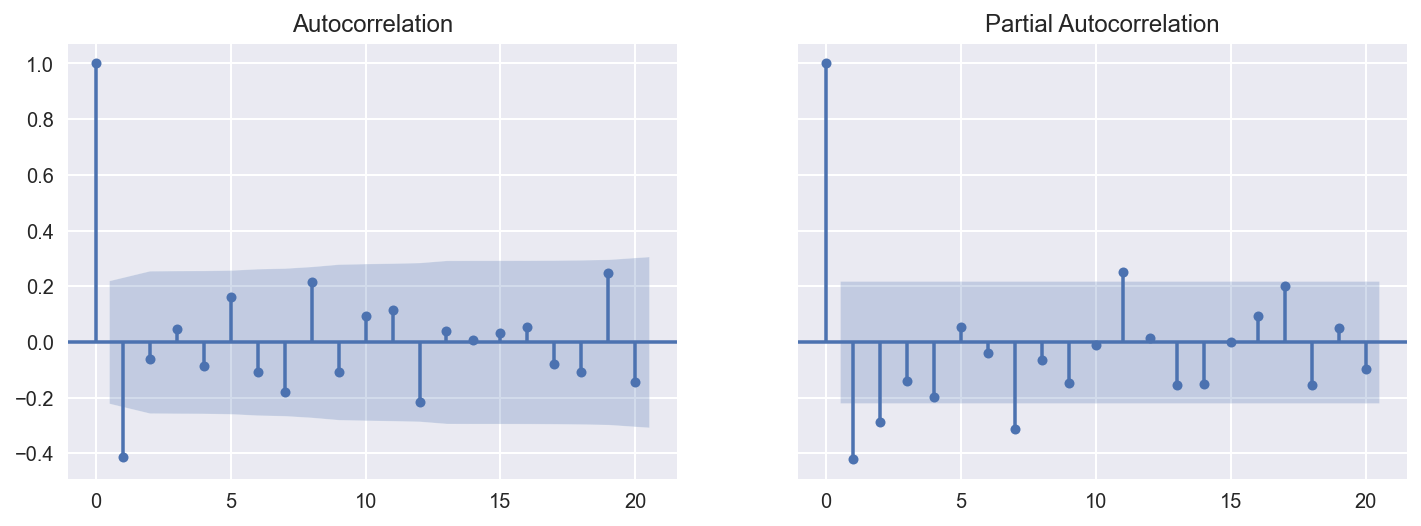

In [22]:
autocorr_plots(df_train_d, lags=20);

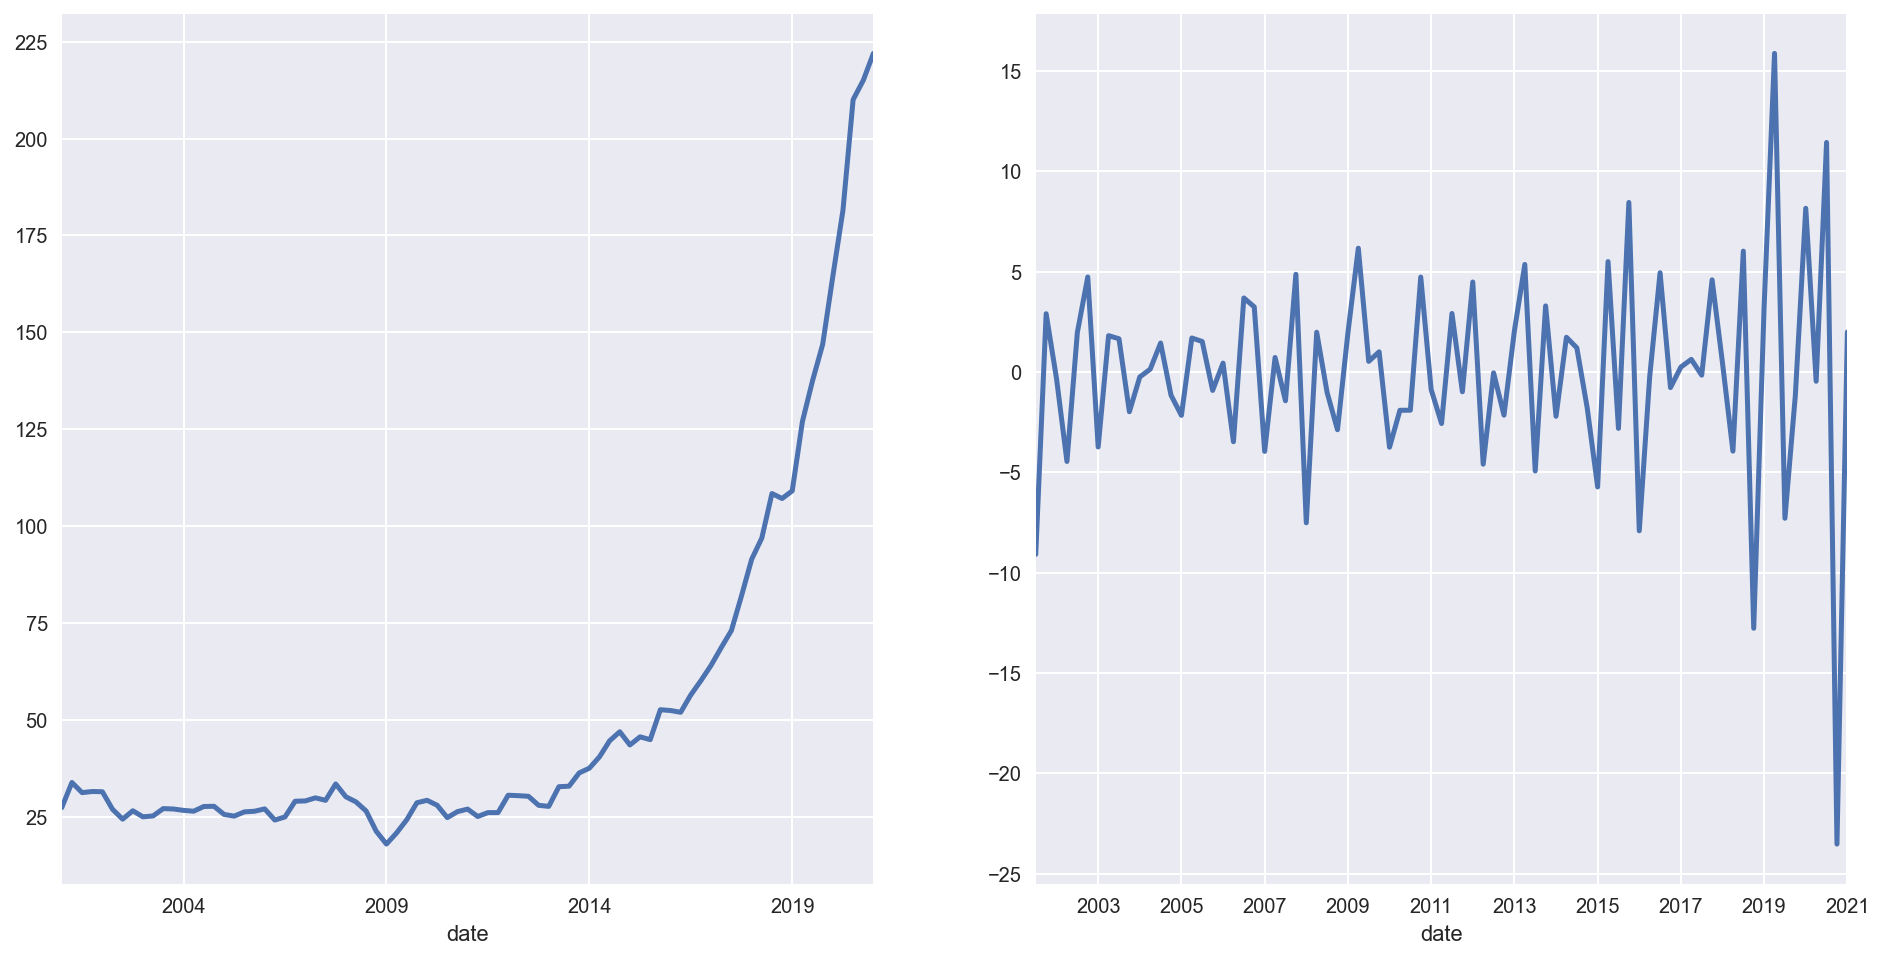

In [23]:
fig,ax=plt.subplots(ncols=2,figsize=(16,8))

subset_df['close'].plot(lw=2.5, ax=ax[0])
df_train_d.plot(lw=2.5, ax=ax[1]);

### Train/Test Split

In [24]:
subset_df.index.max(), subset_df.index.min()

(Timestamp('2021-03-31 00:00:00', freq='Q-DEC'),
 Timestamp('2001-03-31 00:00:00', freq='Q-DEC'))

In [25]:
df_train = subset_df.loc[:'2019']
df_test = subset_df.loc['2019':]
#df_train = subset_df.iloc[:-10]   #all the data except the last 10 records
#df_test = subset_df.iloc[-10:] 

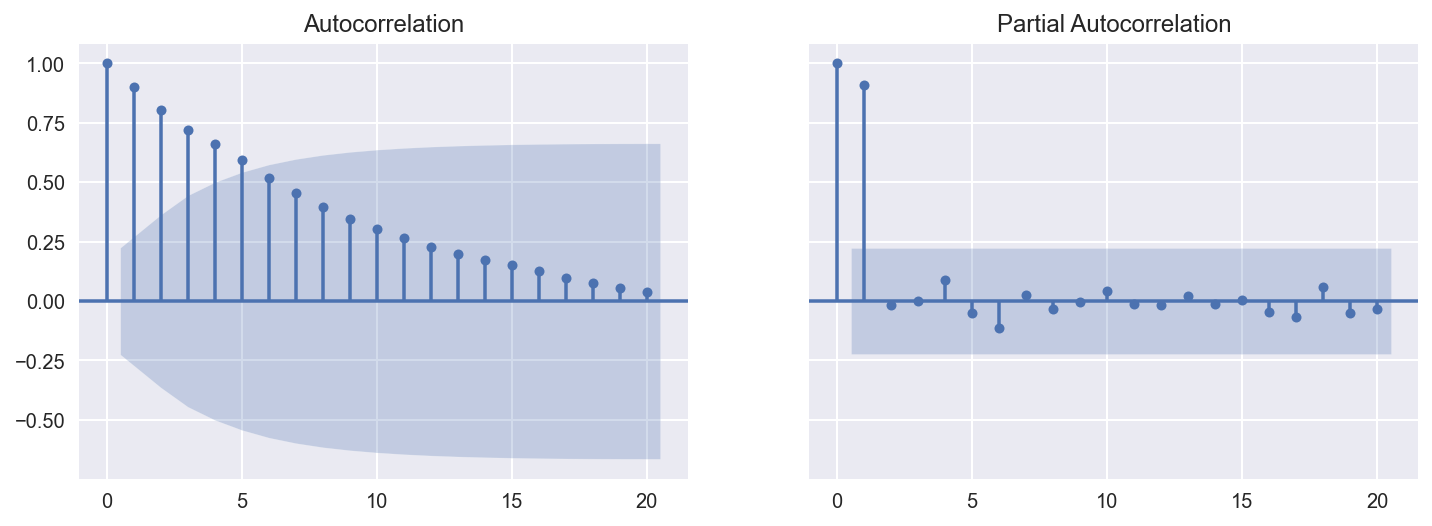

In [26]:
autocorr_plots(df_train, lags=20);

In [27]:
df_train.shape , df_test.shape

((76, 1), (9, 1))

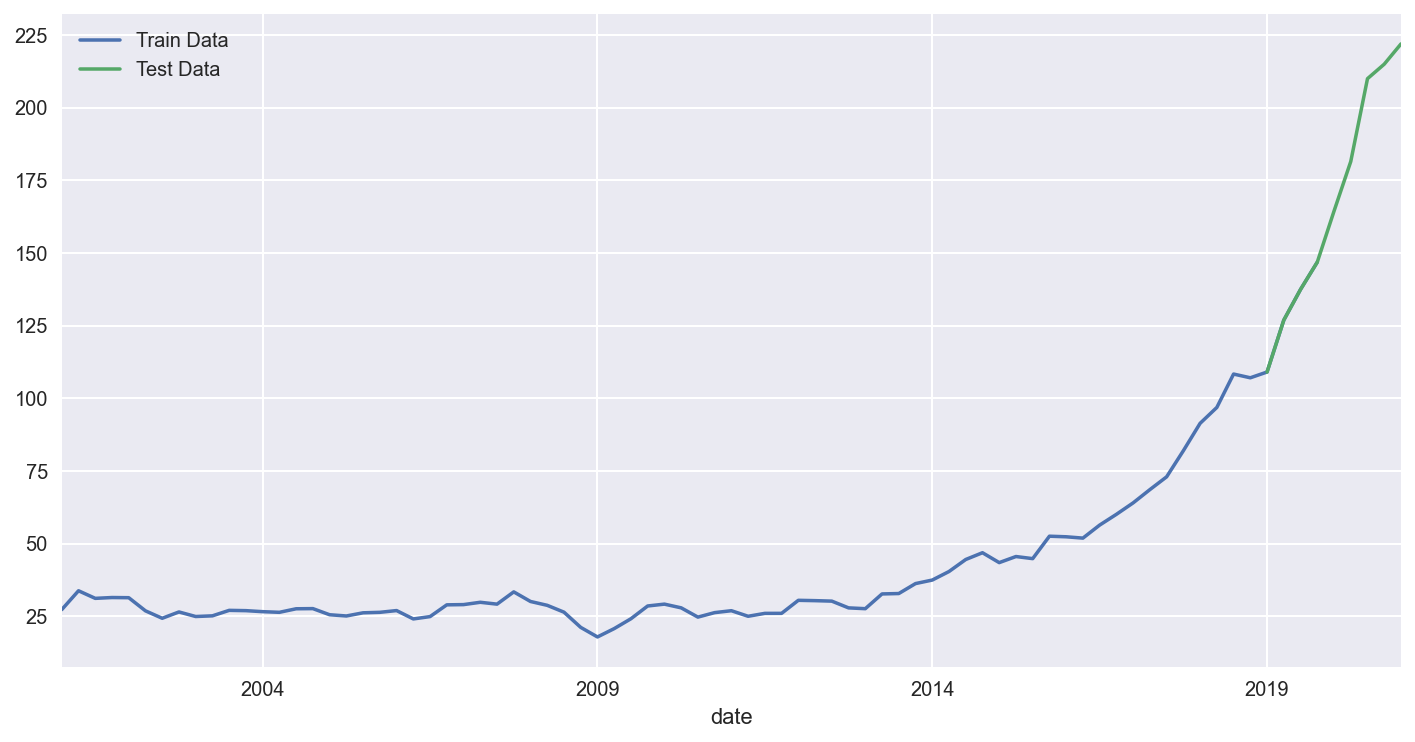

In [28]:
# Plot the train and test sets on the axis ax
fig, ax = plt.subplots(figsize=(12,6))
df_train.plot(ax=ax)
df_test.plot(ax=ax)
ax.legend(labels=['Train Data','Test Data']);


## 3.Modeling

### a.Autoregressive Model (AR) 


#### 1- Fitting models

In [29]:
model = AR(df_train)
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      c  -                  l                  o
Model:                         AR(11)   Log Likelihood                -159.127
Method:                          cmle   S.D. of innovations              2.799
Date:                Sun, 07 Feb 2021   AIC                              2.458
Time:                        16:34:30   BIC                              2.893
Sample:                    03-31-2001   HQIC                             2.630
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8936      2.519     -2.736      0.006     -11.831      -1.956
L1.close       0.9461      0.138      6.843      0.000       0.675       1.217
L2.close      -0.1636      0.189     -0.867      0.386      -0.533       0.206
L3.close       0.1858      0.197      0.944      0.345      -0.200       0.572
L4.close      -0.1202      0.213     -0.564      0.573      -0.538       0.298
L5.close       0.2461      0.211      1.169      0.242      -0.167       0.659
L6.close      -0.0239      0.238     -0.101      0.920      -0.490       0.442
L7.close      -0.1341      0.237     -0.565      0.572      -0.599       0.331
L8.close       0.2480      0.239      1.039      0.299      -0.220       0.716
L9.close       0.0169      0.240      0.071      0.944      -0.453       0.487
L10.close      0.1813      0.225      0.804      0.421      -0.261       0.623
L11.close     -0.1081      0.175     -0.619      0.536      -0.450       0.234
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2114           -0.0000j            1.2114           -0.5000
AR.2            -0.8491           -0.8070j            1.1714           -0.3790
AR.3            -0.8491           +0.8070j            1.1714            0.3790
AR.4            -0.4783           -1.2529j            1.3411           -0.3080
AR.5            -0.4783           +1.2529j            1.3411            0.3080
AR.6             0.3271           -1.0745j            1.1232           -0.2030
AR.7             0.3271           +1.0745j            1.1232            0.2030
AR.8             0.9058           -0.0000j            0.9058           -0.0000
AR.9             0.9136           -0.6491j            1.1207           -0.0983
AR.10            0.9136           +0.6491j            1.1207            0.0983
AR.11            2.1563           -0.0000j            2.1563           -0.0000
------------------------------------------------------------------------------
"""

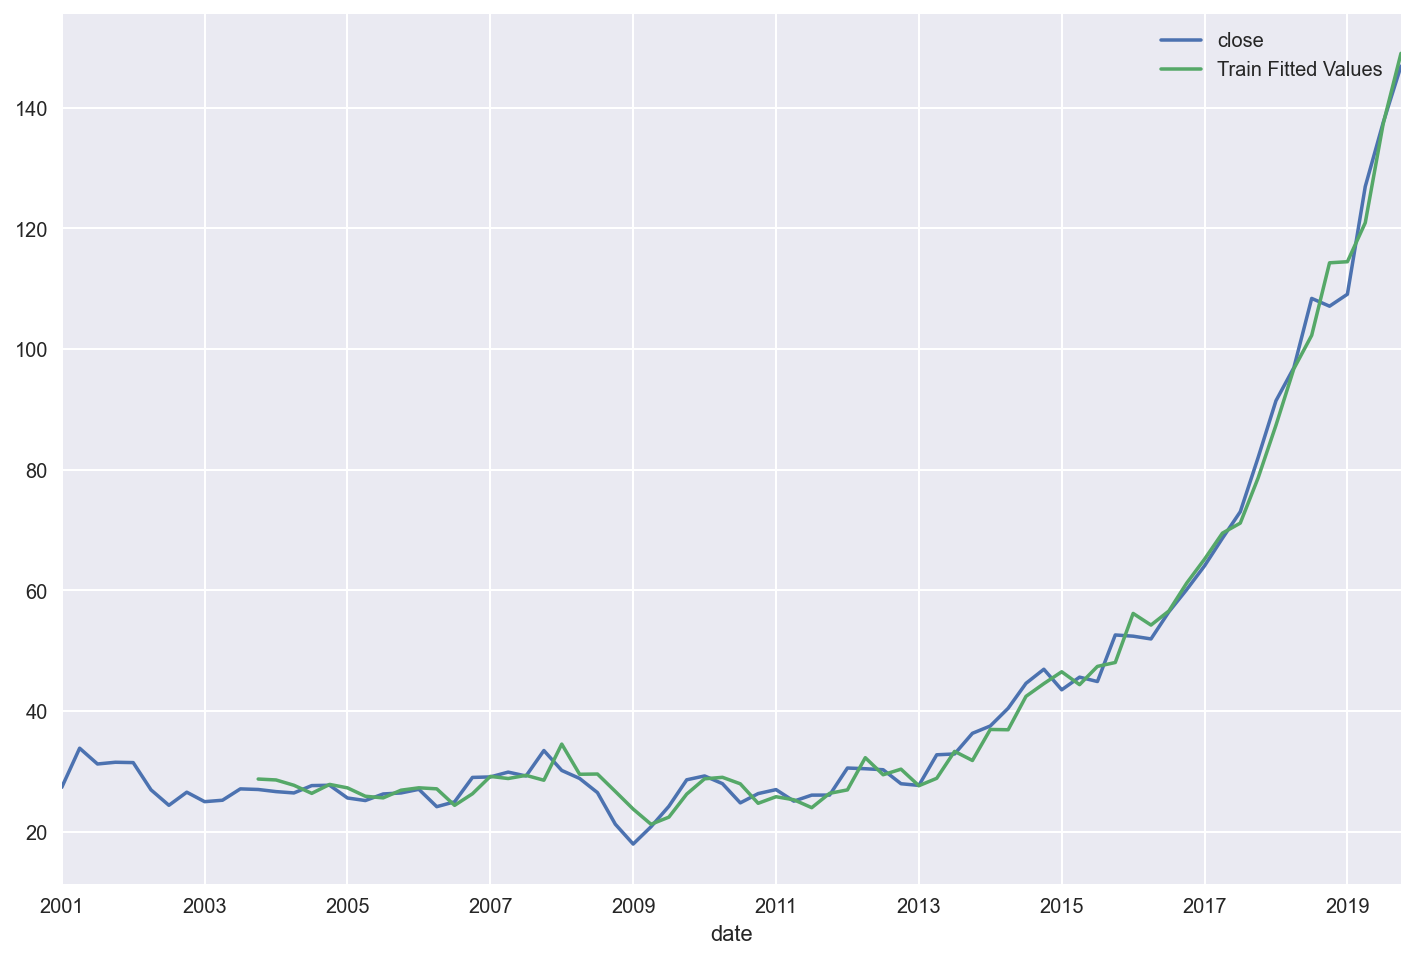

In [30]:
df_train.plot(legend = True,figsize=(12,8))
model_fitted.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

#### 2- Predict values on the test dataset

In [31]:
# plot our prediction for test data

start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

predictions = model_fitted.predict(start, end ,dynamic=False) 

In [32]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<4.4}, expected={df_test['close'][i]}")

predicted=160.7, expected=109.10295081967213
predicted=173.7, expected=126.95539682539679
predicted=192.4, expected=137.51328109375004
predicted=211.2, expected=146.90547
predicted=228.3, expected=164.4490325806452
predicted=248.0, expected=181.52395222222222
predicted=270.2, expected=210.03015312499994
predicted=296.8, expected=215.01015531250002
predicted=326.0, expected=221.97526105263157


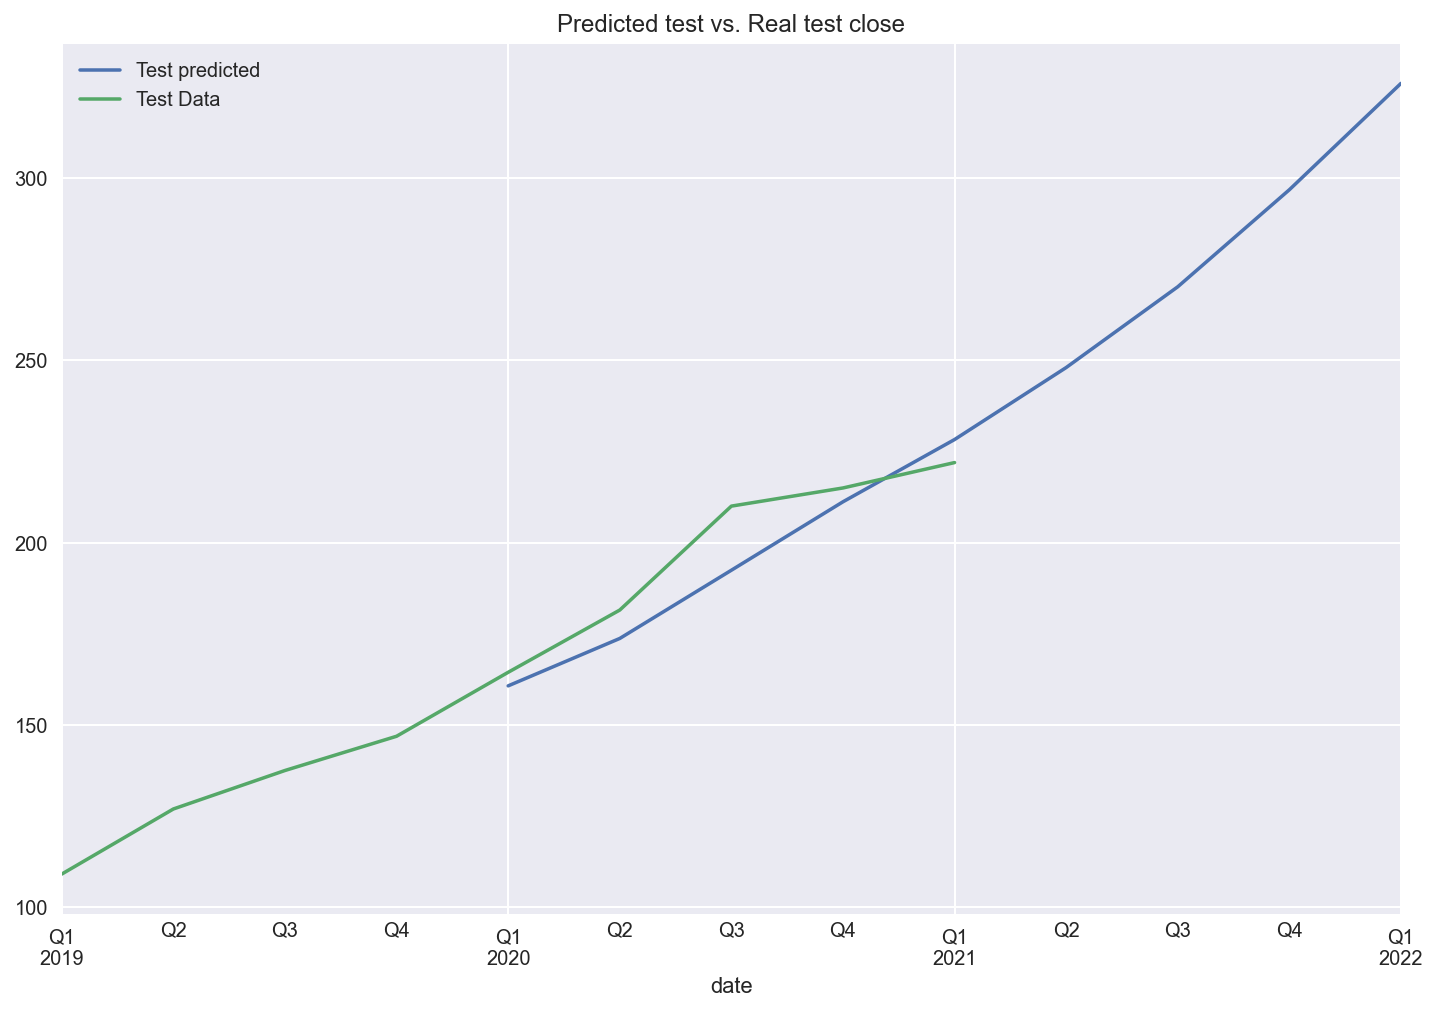

In [33]:
title = 'Predicted test vs. Real test close'
ax=predictions.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted','Test Data']);

#### 3- Evaluate the Model

In [34]:
from statsmodels.tools.eval_measures import rmse

error = rmse(df_test['close'], predictions)
print(f'AR RMSE Error: {error:11.10}')

AR RMSE Error:  68.0192419


### 4- Forcast the Future

**Retrain the model on the full data, and forecast the future**

In [35]:
model = AR(subset_df)
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      c  -                  l                  o
Model:                         AR(11)   Log Likelihood                -180.905
Method:                          cmle   S.D. of innovations              3.207
Date:                Sun, 07 Feb 2021   AIC                              2.702
Time:                        16:34:31   BIC                              3.120
Sample:                    03-31-2001   HQIC                             2.868
                         - 03-31-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.6701      2.698     -2.843      0.004     -12.958      -2.382
L1.close       0.9441      0.134      7.066      0.000       0.682       1.206
L2.close      -0.2650      0.183     -1.451      0.147      -0.623       0.093
L3.close       0.2105      0.209      1.006      0.315      -0.200       0.621
L4.close      -0.0370      0.211     -0.175      0.861      -0.450       0.376
L5.close       0.2933      0.208      1.409      0.159      -0.115       0.701
L6.close      -0.3356      0.214     -1.566      0.117      -0.756       0.085
L7.close       0.0388      0.219      0.177      0.859      -0.390       0.467
L8.close       0.6924      0.221      3.136      0.002       0.260       1.125
L9.close      -0.3312      0.247     -1.341      0.180      -0.815       0.153
L10.close      0.2129      0.238      0.893      0.372      -0.254       0.680
L11.close     -0.1160      0.197     -0.590      0.555      -0.501       0.269
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1342           -0.0000j            1.1342           -0.5000
AR.2            -0.7467           -0.7110j            1.0311           -0.3789
AR.3            -0.7467           +0.7110j            1.0311            0.3789
AR.4             0.9058           -0.0000j            0.9058           -0.0000
AR.5             0.8278           -0.6697j            1.0648           -0.1083
AR.6             0.8278           +0.6697j            1.0648            0.1083
AR.7             0.1216           -1.0416j            1.0487           -0.2315
AR.8             0.1216           +1.0416j            1.0487            0.2315
AR.9             1.9140           -0.0000j            1.9140           -0.0000
AR.10           -0.1278           -1.8141j            1.8186           -0.2612
AR.11           -0.1278           +1.8141j            1.8186            0.2612
------------------------------------------------------------------------------
"""

**Do a forcast for 12 Quarters**

In [36]:
# Do a forcast for 12 Quarters
fcast = model_fitted.predict(start=len(subset_df),end=len(subset_df)+12,dynamic=False).rename('AR Forecast')

**Plot our forcast**

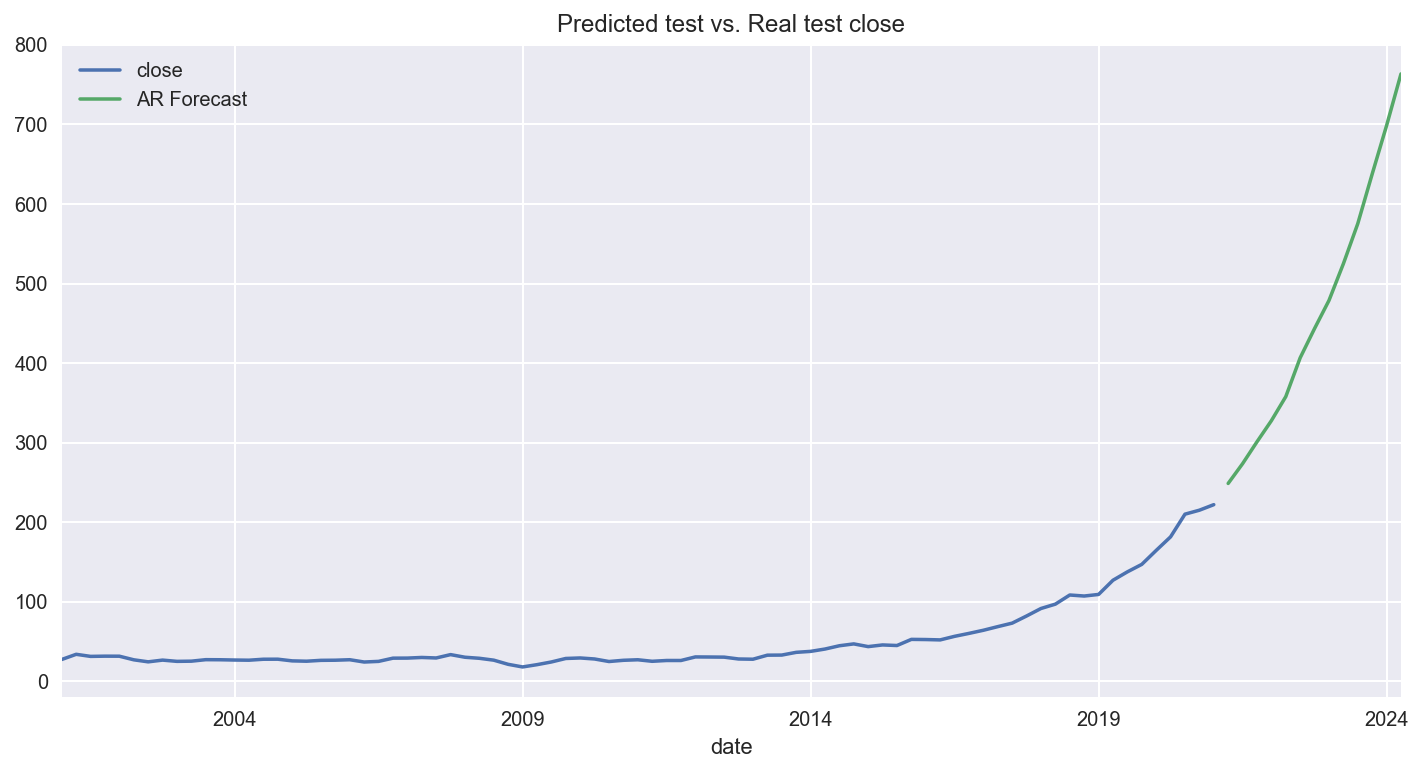

In [37]:
# plot predictions and actual values 
title = 'Predicted test vs. Real test close'
ax = subset_df['close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True);

### b.ARIMA model

#### 1- Using Auto-ARIMA to determine (p,d,q)

In [38]:
auto_fit = auto_arima(df_train_d, start_p=0, start_q=0,
                          max_p=2, max_q=2, 
                          m=29,                     # m is used for seasonality, m=1 means no seasonality (cover this later)
                          seasonal=False,          # We do not want seasonality here
                          d=1,  # The order of first-differencing. If None (by default), automatically be selected
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

auto_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=561.864, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=521.085, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=559.885, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=501.932, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=499.961, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=519.101, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 0.673 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -246.981
Date:                Sun, 07 Feb 2021   AIC                            499.961
Time:                        16:34:32   BIC                            507.031
Sample:                             0   HQIC                           502.792
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9870      0.152     -6.499      0.000      -1.285      -0.689
ar.L2         -0.5559      0.165     -3.364      0.001      -0.880      -0.232
sigma2        32.4239      2.800     11.582      0.000      26.937      37.911
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):               166.20
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               5.43   Skew:                            -1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The values of (p,d,q) suggested by auto-arima for ARIMA(2,1,0)**

#### 2- Fitting models

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
model = ARIMA(df_train,order=(2,1,0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                   75
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -201.882
Method:                       css-mle   S.D. of innovations              3.565
Date:                Sun, 07 Feb 2021   AIC                            411.764
Time:                        16:34:32   BIC                            421.034
Sample:                    06-30-2001   HQIC                           415.466
                         - 12-31-2019                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7973      0.860      2.089      0.037       0.111       3.484
ar.L1.D.close     0.3564      0.116      3.064      0.002       0.128       0.584
ar.L2.D.close     0.1707      0.121      1.408      0.159      -0.067       0.408
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5918           +0.0000j            1.5918            0.0000
AR.2           -3.6794           +0.0000j            3.6794            0.5000
-----------------------------------------------------------------------------
"""

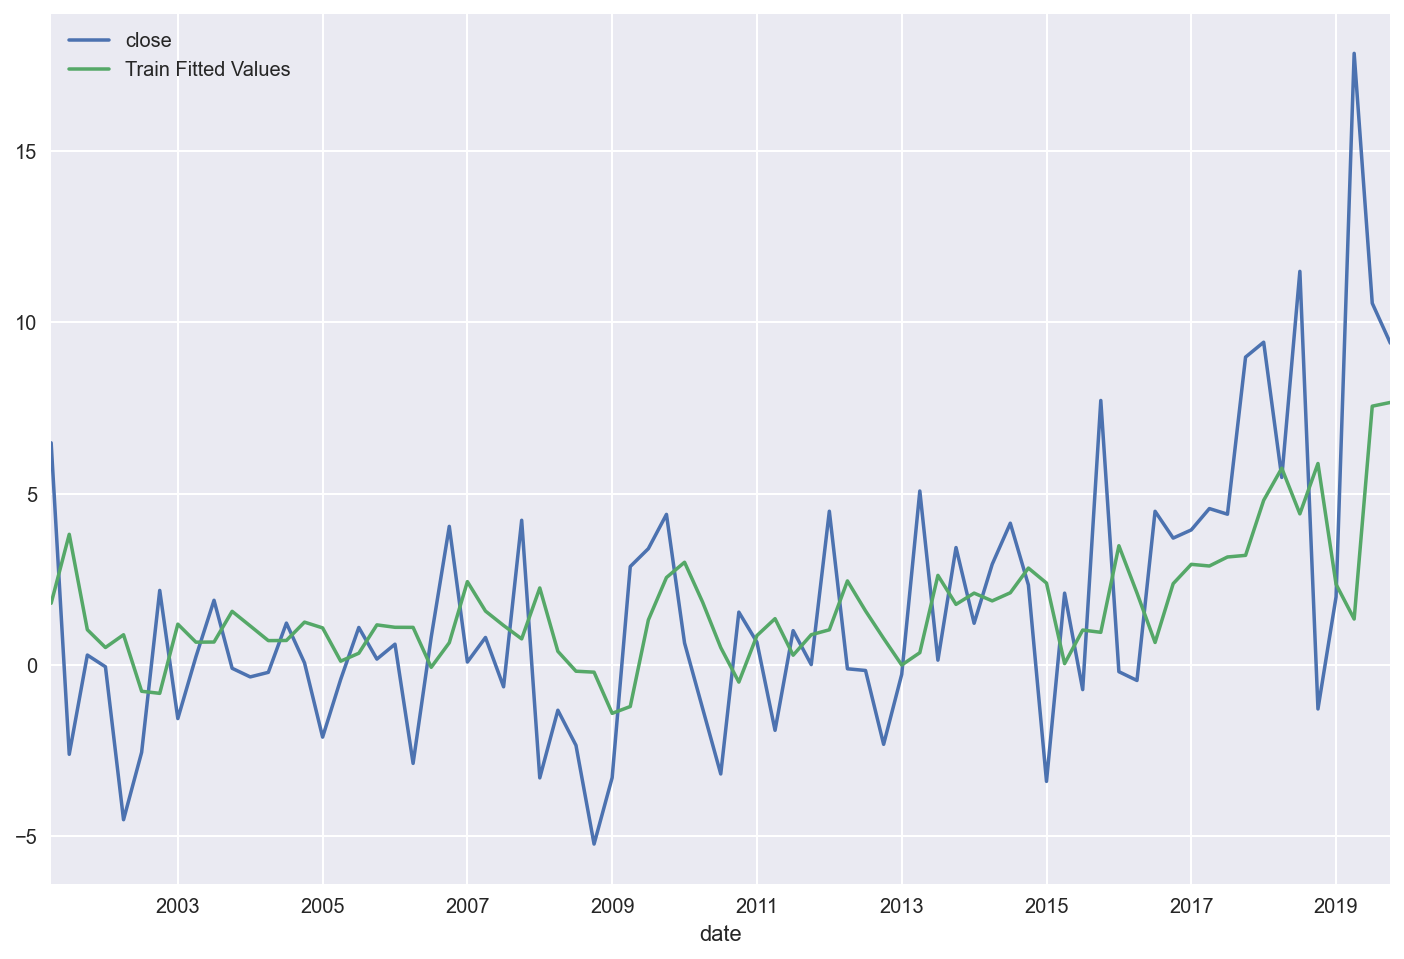

In [41]:
df_train.diff().dropna().plot(legend = True,figsize=(12,8))
res.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

#### 3. Predict values on the test dataset

In [42]:
# plot our prediction for test data


start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = res.predict(start, end,typ ='levels',dynamic=False) 

In [43]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<4.4}, expected={df_test['close'][i]}")

predicted=152.9, expected=109.10295081967213
predicted=157.5, expected=126.95539682539679
predicted=161.0, expected=137.51328109375004
predicted=163.9, expected=146.90547
predicted=166.4, expected=164.4490325806452
predicted=168.6, expected=181.52395222222222
predicted=170.7, expected=210.03015312499994
predicted=172.6, expected=215.01015531250002
predicted=174.5, expected=221.97526105263157


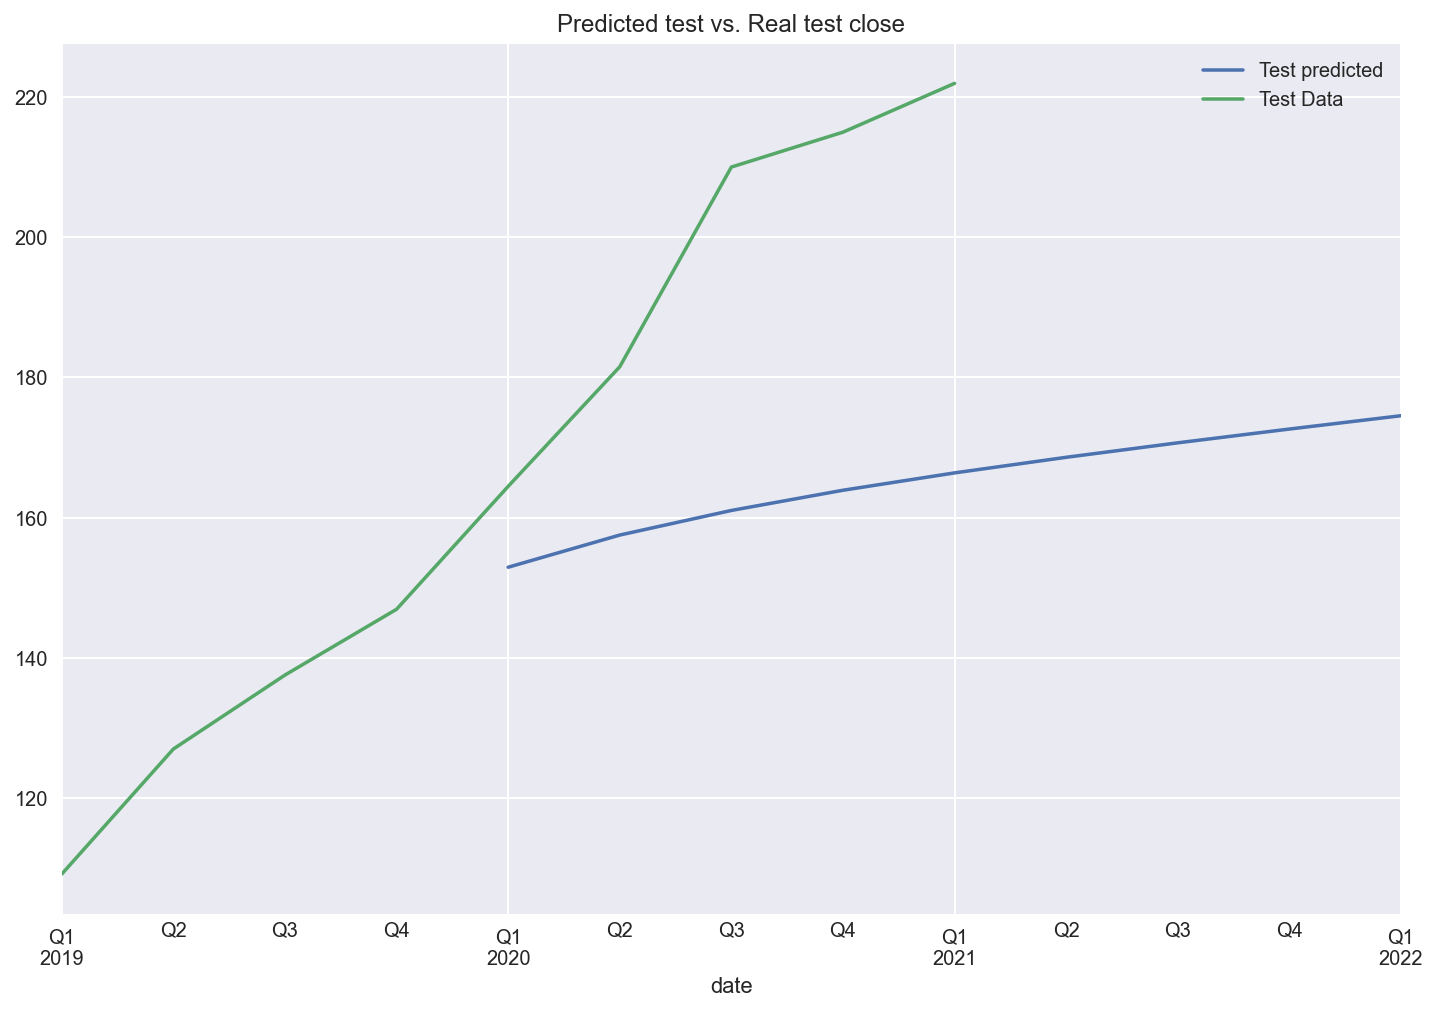

In [44]:
title = 'Predicted test vs. Real test close'
ax=predictions.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted','Test Data']);

#### 4. Evaluate the Model

In [45]:
from statsmodels.tools.eval_measures import rmse

error = rmse(df_test['close'], predictions)
print(f'ARIMA(0,2,1) RMSE Error: {error:11.10}')

ARIMA(0,2,1) RMSE Error: 32.42013801


### 5- Forcast the Future

**Retrain the model on the full data, and forecast the future**

In [46]:
# train our model on all the data (unsplitted data)
model = ARIMA(subset_df,order=(0,2,1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.close   No. Observations:                   79
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -225.142
Method:                       css-mle   S.D. of innovations              4.155
Date:                Sun, 07 Feb 2021   AIC                            456.285
Time:                        16:34:33   BIC                            463.393
Sample:                    09-30-2001   HQIC                           459.133
                         - 03-31-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1582      0.097      1.639      0.101      -0.031       0.347
ma.L1.D2.close    -0.8047      0.065    -12.439      0.000      -0.931      -0.678
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2427           +0.0000j            1.2427            0.0000
-----------------------------------------------------------------------------
"""

### Do a forcast for 12 Quarters 

In [47]:
# Do a forcast for 12 Quarters (3 years)
fcast = res.predict(start=len(subset_df),end=len(subset_df)+12,typ='levels',dynamic=False).rename('ARIMA(0,2,1) Forecast')


###  Plot our forcast

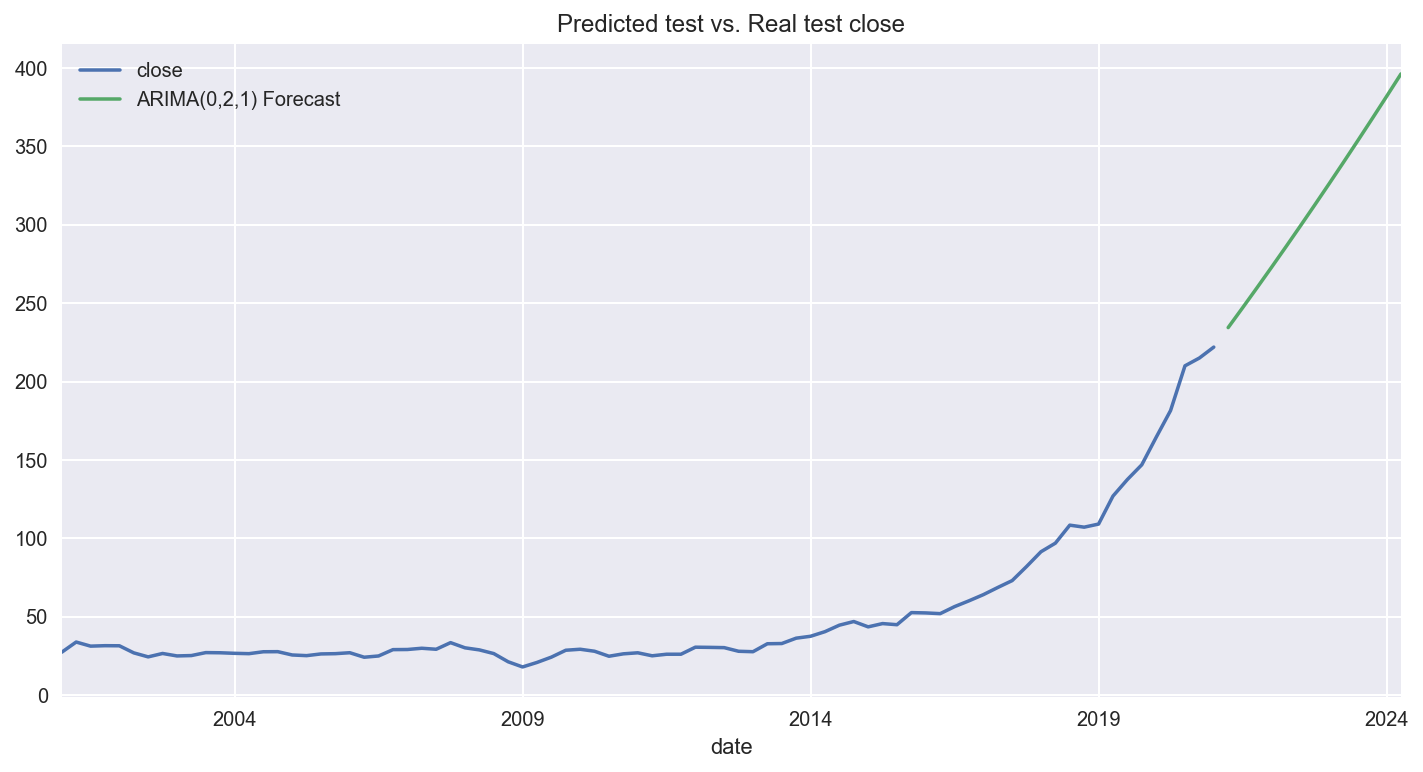

In [48]:
# plot predictions and actual values 
title = 'Predicted test vs. Real test close'
ax = subset_df['close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True);

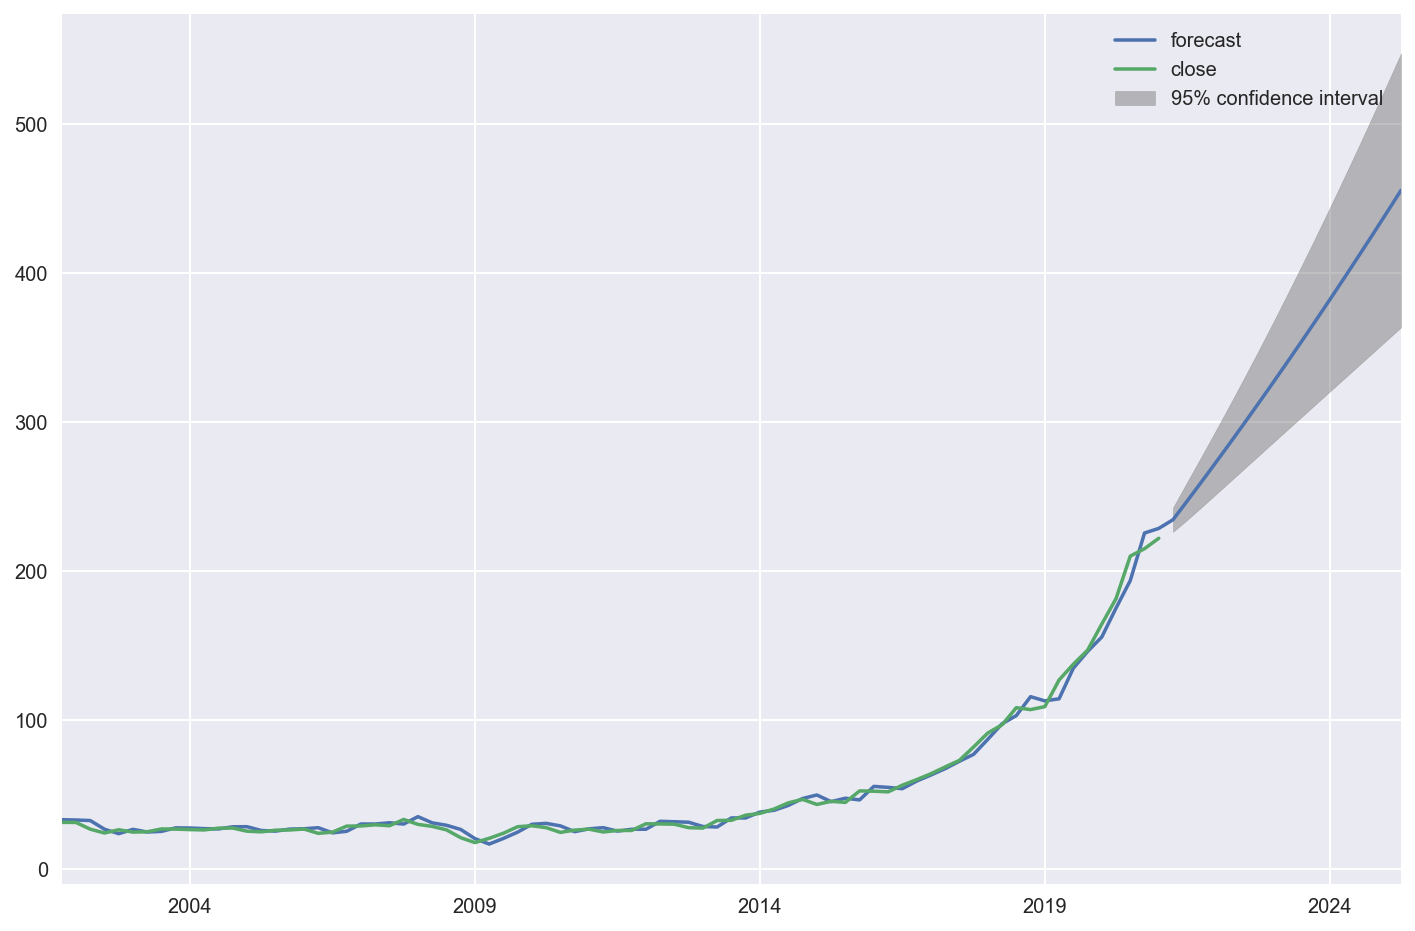

In [49]:
start_1 = 3
end_1 = len(df_train)+len(df_test)+12
fig, ax = plt.subplots(figsize=(12,8)) 
res.plot_predict(start=start_1, end=end_1, ax =ax);
plt.show()

### c.Holt Model

#### 1- Fitting models

Fit many modes:

In [50]:
fit1 = Holt(df_train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fit2 = Holt(df_train, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fit3 = Holt(df_train, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)

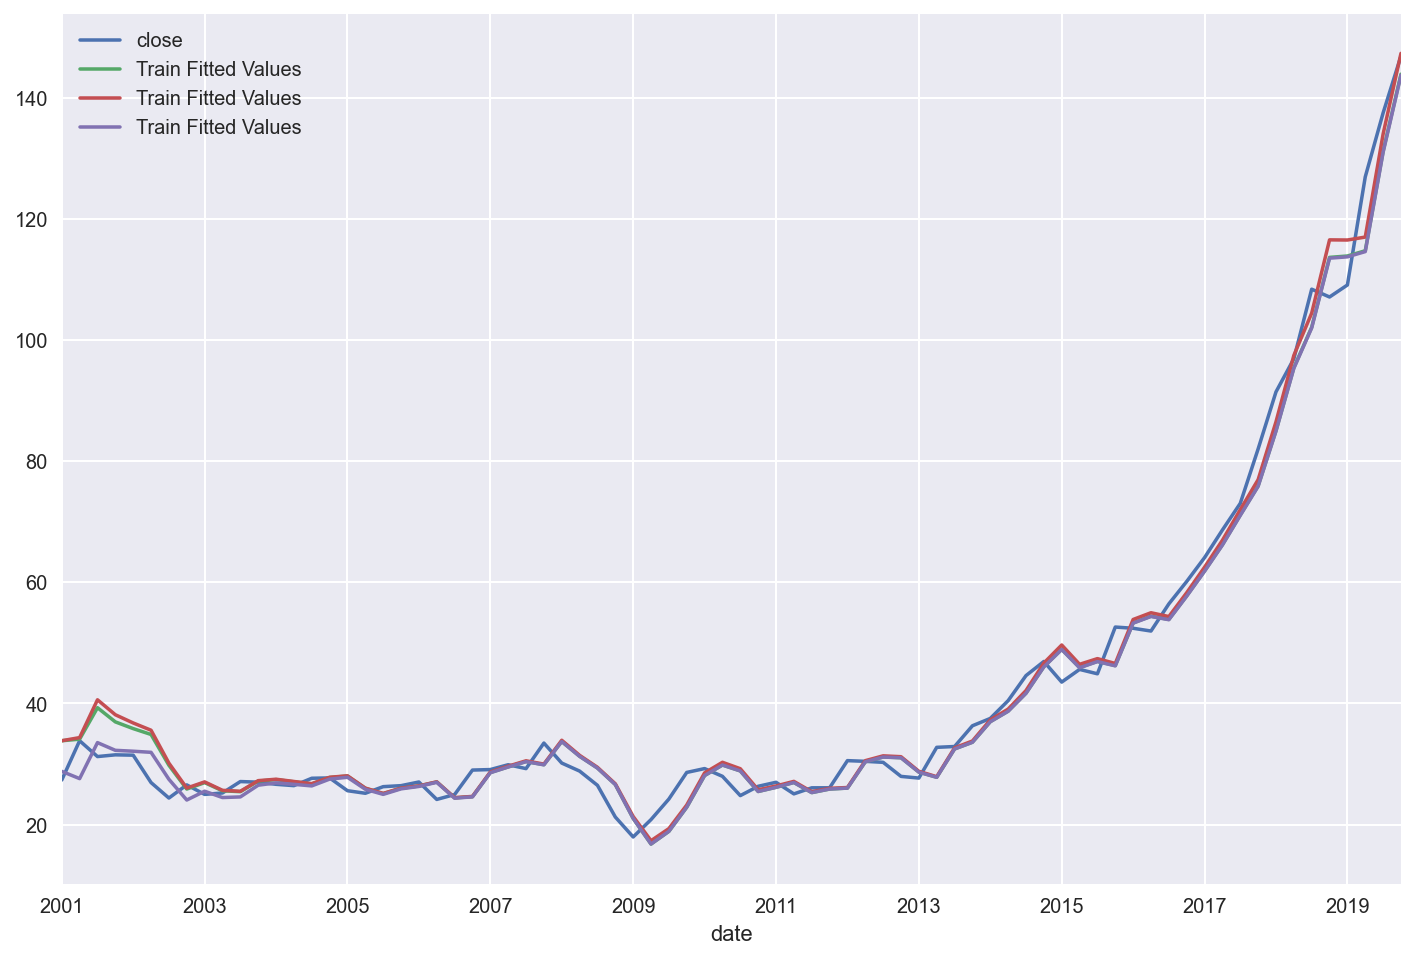

In [51]:
df_train.plot(legend = True,figsize=(12,8))
fit1.fittedvalues.rename("Train Fitted Values").plot(legend = True)
fit2.fittedvalues.rename("Train Fitted Values").plot(legend = True)
fit3.fittedvalues.rename("Train Fitted Values").plot(legend = True)

plt.show()

#### 2. Predict values on the test dataset

In [52]:
# plot our prediction for test data


start = len(df_train) 
end = len(df_train) + len(df_test) -1
  
# Predictions for the test set 

# Notice below typ='level' , it will predict the levels of the original variables (undifferenced)
predictions = fit1.predict(start, end ) 
predictions2 = fit2.predict(start, end ) 
predictions3 = fit3.predict(start, end ) 

In [53]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<4.4}, expected={df_test['close'][i]}")
    print(f"predicted2={predictions2[i]:<4.4}, expected={df_test['close'][i]}")
    print(f"predicted3={predictions3[i]:<4.4}, expected={df_test['close'][i]}")
    

predicted=154.4, expected=109.10295081967213
predicted2=158.2, expected=109.10295081967213
predicted3=154.3, expected=109.10295081967213
predicted=162.6, expected=126.95539682539679
predicted2=170.3, expected=126.95539682539679
predicted3=162.2, expected=126.95539682539679
predicted=170.7, expected=137.51328109375004
predicted2=183.3, expected=137.51328109375004
predicted3=170.1, expected=137.51328109375004
predicted=178.9, expected=146.90547
predicted2=197.4, expected=146.90547
predicted3=178.0, expected=146.90547
predicted=187.0, expected=164.4490325806452
predicted2=212.4, expected=164.4490325806452
predicted3=185.8, expected=164.4490325806452
predicted=195.2, expected=181.52395222222222
predicted2=228.7, expected=181.52395222222222
predicted3=193.6, expected=181.52395222222222
predicted=203.3, expected=210.03015312499994
predicted2=246.2, expected=210.03015312499994
predicted3=201.4, expected=210.03015312499994
predicted=211.5, expected=215.01015531250002
predicted2=265.0, expected

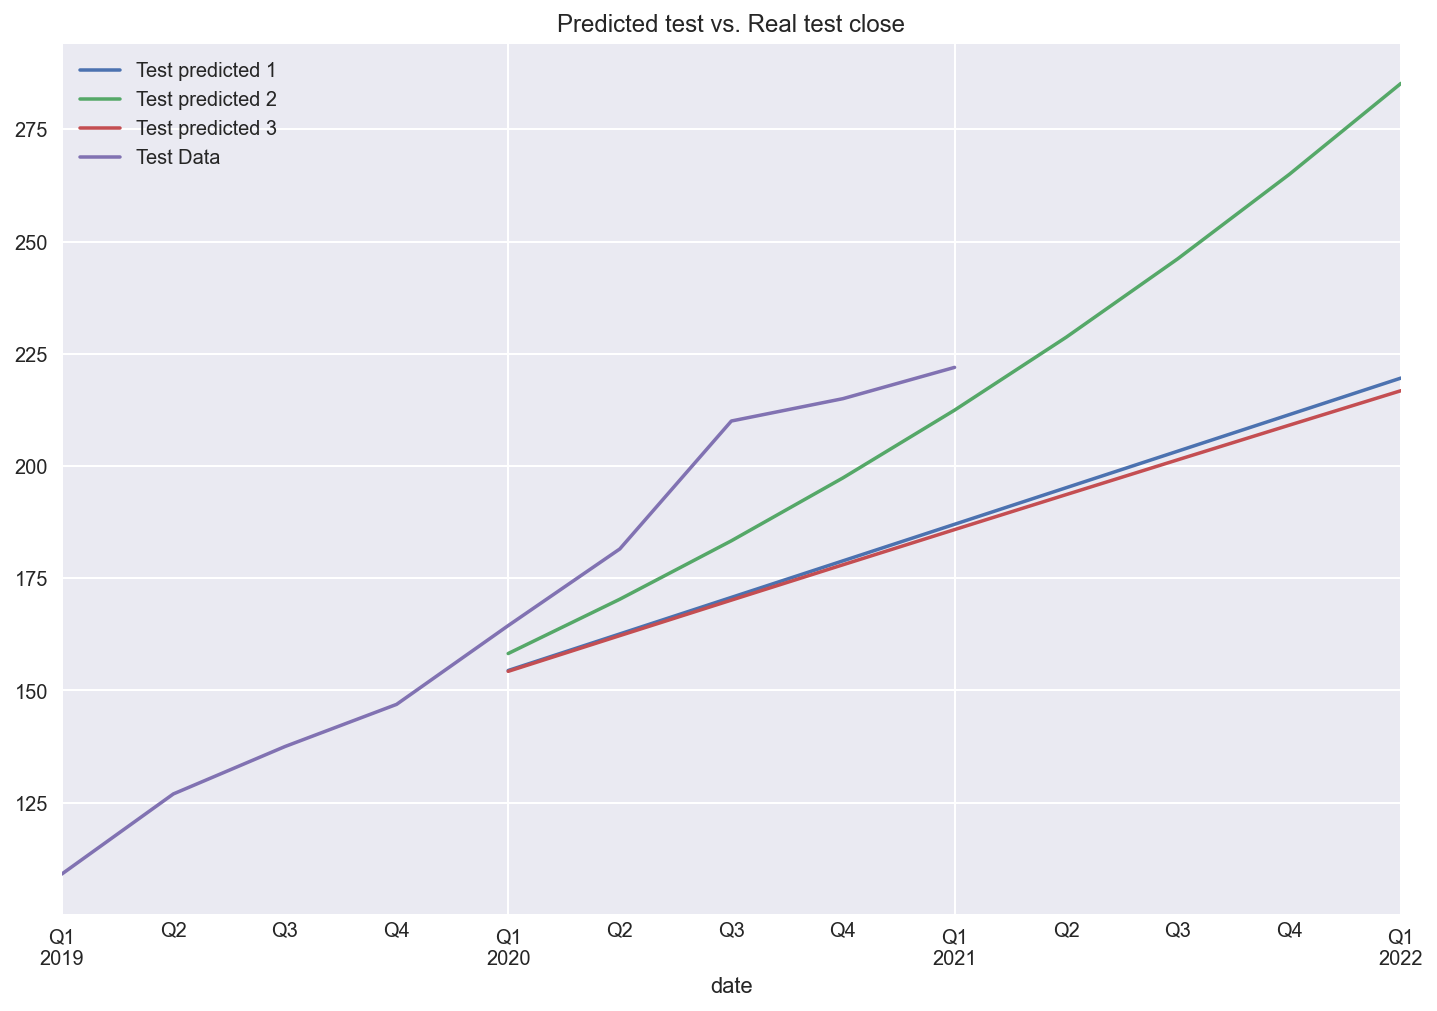

In [54]:
title = 'Predicted test vs. Real test close'
ax=predictions.plot(legend = True,figsize=(12,8),title=title) 
ax=predictions2.plot(legend = True,figsize=(12,8),title=title) 
ax=predictions3.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted 1','Test predicted 2', 'Test predicted 3','Test Data']);

#### 4. Evaluate the Model

In [55]:
from statsmodels.tools.eval_measures import rmse

error = rmse(df_test['close'], predictions)
print(f'Holt 1 RMSE Error: {error:11.10}')
error = rmse(df_test['close'], predictions2)
print(f'Holt 2 RMSE Error: {error:11.10}')
error = rmse(df_test['close'], predictions3)
print(f'Holt 3 RMSE Error: {error:11.10}')

Holt 1 RMSE Error: 26.27156336
Holt 2 RMSE Error: 48.62108529
Holt 3 RMSE Error: 25.93770204


#### 4- Forcast the Future
**Retrain the model on the full data, and forecast the future**

In [56]:
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fcast2 = fit2.forecast(12).rename("Exponential trend")
fcast3 = fit3.forecast(12).rename("Additive damped trend")

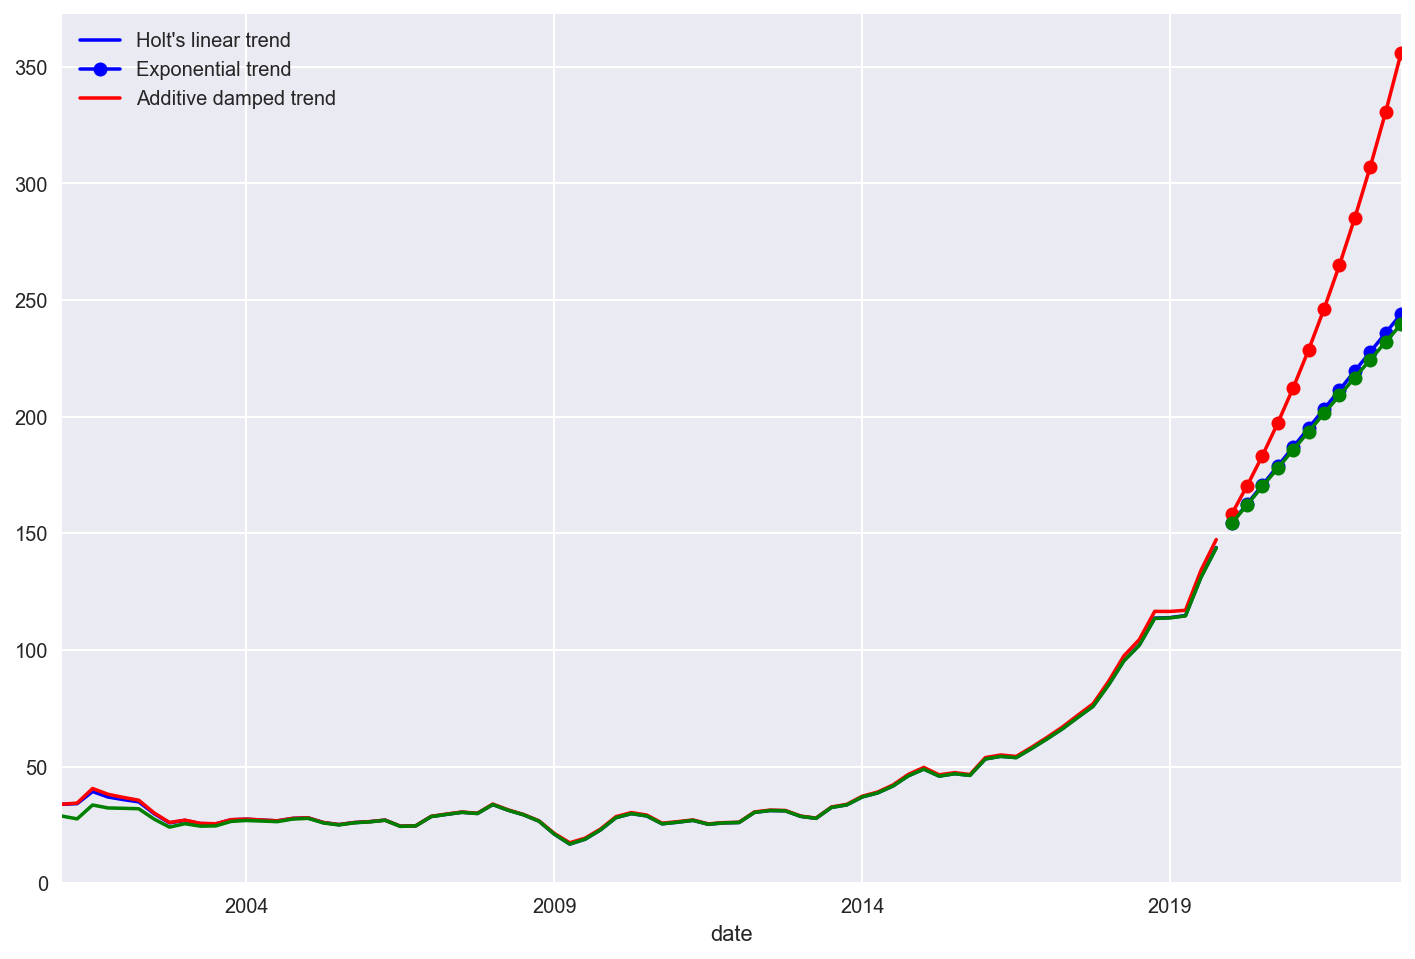

In [57]:
fit1.fittedvalues.plot( color='blue')
fcast1.plot(color='blue', marker="o", legend=True ,figsize=(12,8))
fit2.fittedvalues.plot( color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot( color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

In the above graph, we can see the model is able to pick the level and the trend, the damped trend parameter tells whether you want to keep or damped the trend in the long run.

### d.Exponentia lSmoothing Model

#### 1- Fitting models

In [58]:
ei = ExponentialSmoothing(df_train, freq='Q', trend='mul', seasonal='mul' , seasonal_periods= 25).fit()
ei.summary()

Dep. Variable:,close,No. Observations:,76
Model:,ExponentialSmoothing,SSE,297.530
Optimized:,True,AIC,161.723
Trend:,Multiplicative,BIC,229.315
Seasonal:,Multiplicative,AICC,206.814
Seasonal Periods:,25,Date:,"Sun, 07 Feb 2021"
Box-Cox:,False,Time:,16:34:35
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8955963,alpha,True
smoothing_trend,0.1398976,beta,True


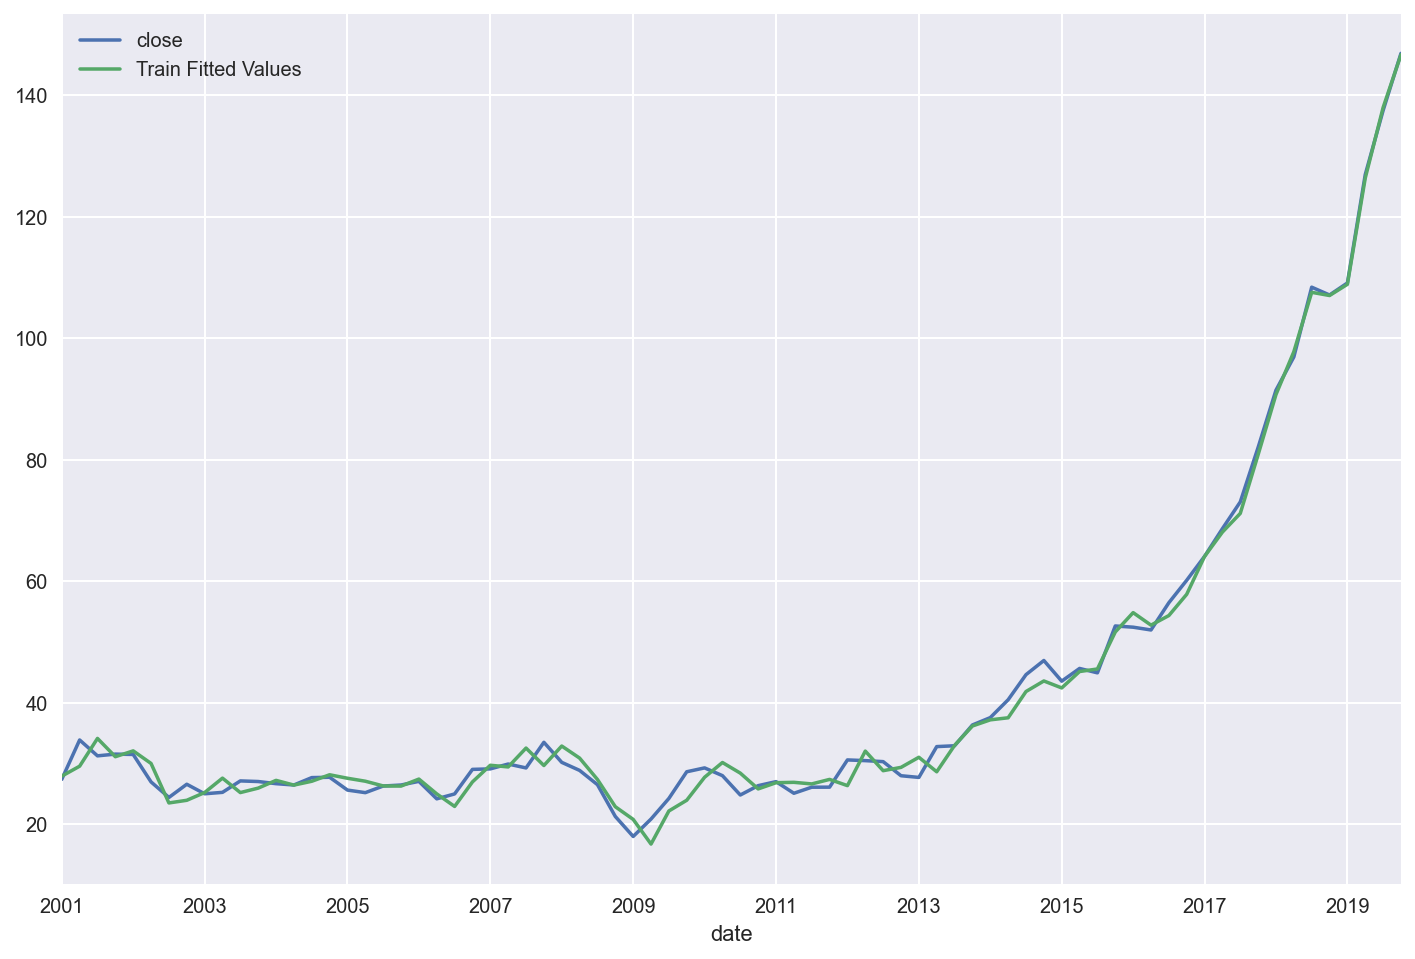

In [59]:
df_train.plot(legend = True,figsize=(12,8))
ei.fittedvalues.rename("Train Fitted Values").plot(legend = True)
plt.show()

#### 2. Predict values on the test dataset

In [60]:
test_predict = ei.predict(start='2019-03-31', end='2021-03-31')

In [61]:
# Compare predictions to expected values
for i in range(len(test_predict)):
    print(f"predicted={test_predict[i]:<4.4}, expected={df_test['close'][i]}")

predicted=108.9, expected=109.10295081967213
predicted=126.4, expected=126.95539682539679
predicted=138.0, expected=137.51328109375004
predicted=146.7, expected=146.90547
predicted=168.9, expected=164.4490325806452
predicted=180.8, expected=181.52395222222222
predicted=188.8, expected=210.03015312499994
predicted=203.4, expected=215.01015531250002
predicted=205.0, expected=221.97526105263157


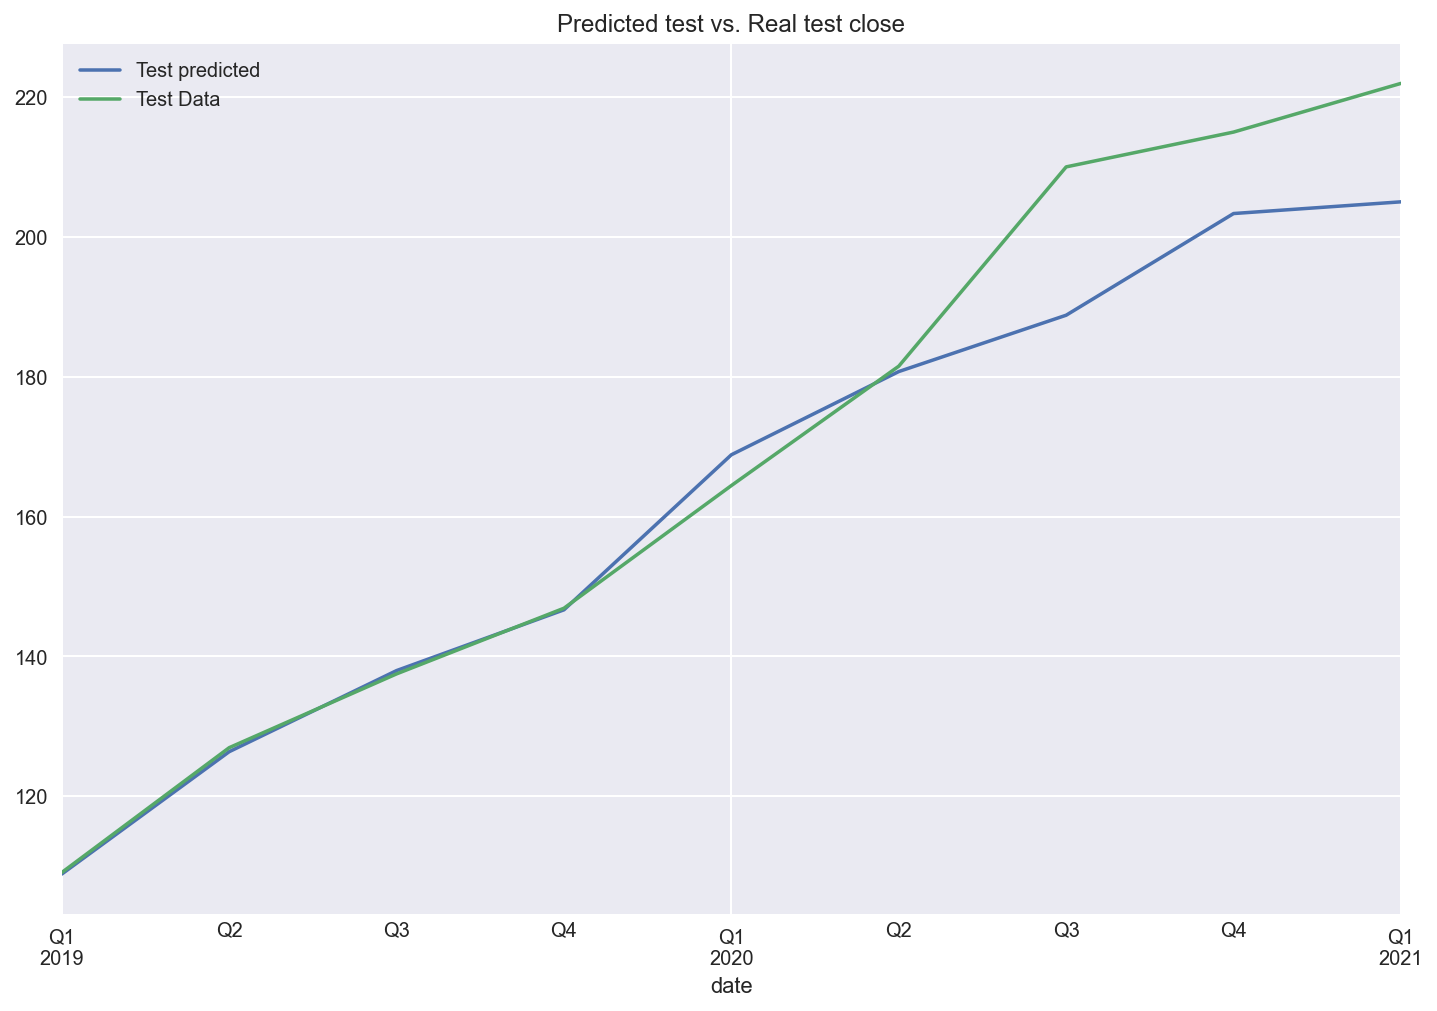

In [62]:
title = 'Predicted test vs. Real test close'
ax=test_predict.plot(legend = True,figsize=(12,8),title=title) 
df_test.plot(legend = True,ax=ax);
ax.legend(labels=['Test predicted','Test Data']);

#### 3. Evaluate the Model

In [63]:
error = rmse(df_test['close'], test_predict)
print(f'Exponentia lSmoothing Model  RMSE Error: {error:11.10}')

Exponentia lSmoothing Model  RMSE Error: 9.963839976


### 4- Forcast the Future

In [64]:
# Do a forcast for 12 Quarters
fcast = ei.predict(start=len(subset_df),end=len(subset_df)+12).rename('Forecast')

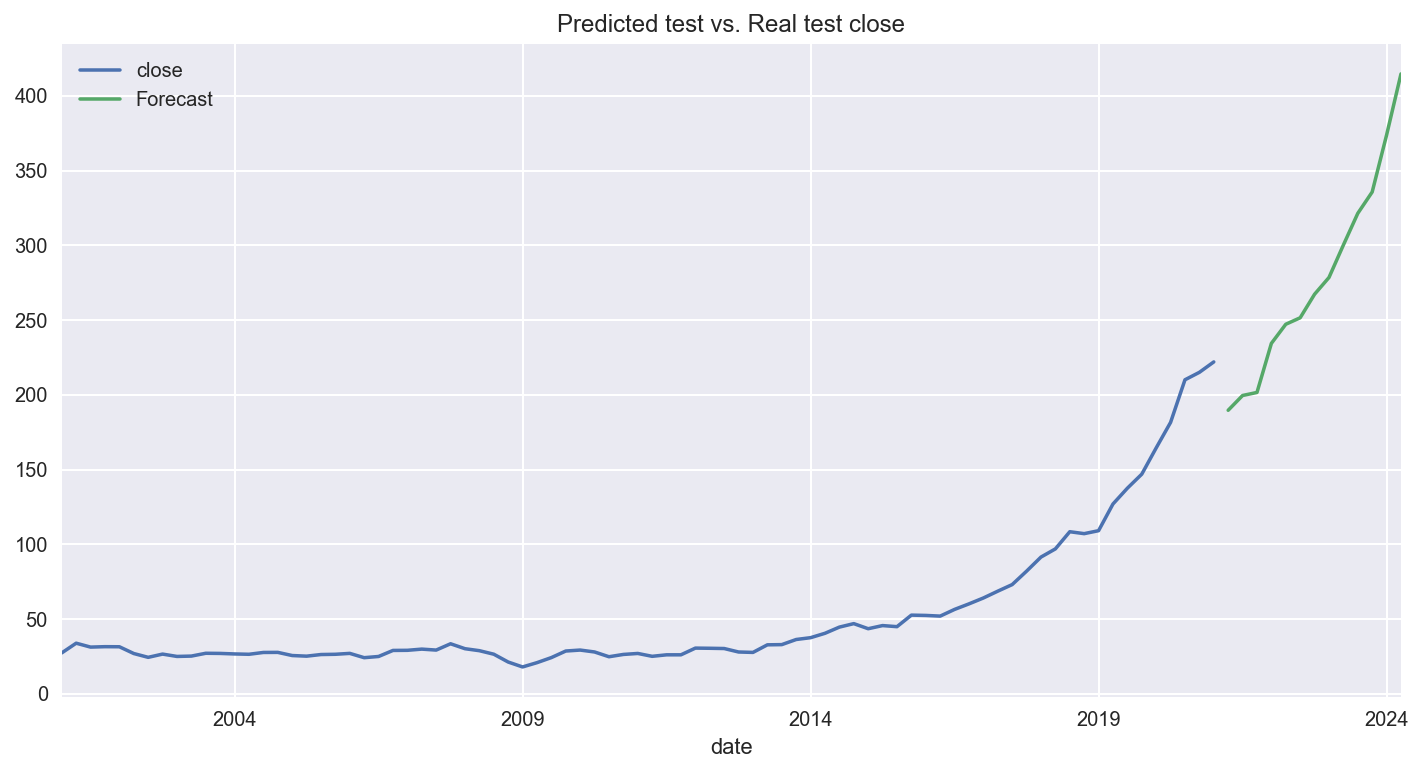

In [65]:
title = 'Predicted test vs. Real test close'
ax = subset_df['close'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True);